# Handling JMA RMSC typhoon best tracks using [besttracks](https://github.com/jsasaki-utokyo/besttracks)
**Author: Jun SASAKI  coded on November 25, 2021, updated on November 27, 2021**<br>
[JMA Data Source](http://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/besttrack.html) [JMA Data Format](http://www.jma.go.jp/jma/jma-eng/jma-center/rsmc-hp-pub-eg/Besttracks/e_format_bst.html)

`df=parseJMA(fpath)` is pandasDataFrame recommended for handling each typhoon track

```python
def parse_TCs(filename, rec_cond=None, tc_cond=None, agency='JMA', wndunit='knot'):
    '''
    Parse TC Best-Track data from various agents.

    Parameters
    ----------
    filename: str or sequence
        Either a string glob in the form ``"path/to/my/files/*.txt"`` or an
        explicit list of files to open.
    rec_cond: lambda expression
        Used by pandas.dataframe.loc[cond].  Example like:
            lambda df:df['TIME'].dt.hour.isin([0, 6, 12, 18])
            lamda df:df['TIME'].dt.year == 2019
    tc_cond: lambda expression
        Used to filter the TCs.  Example like: lambda tc: tc.year == 2018
    agency: str
        String for the data agencies, availables are ['JTWC', 'JMA', 'CMA', 'NHC', 'IBTrACS', 'BABJ'].
    wndunit: str
        Convert wind unit to wndunit, 'knot' or 'm/s'.
    
    Returns
    -------
    List of TC (data struct of a namedtuple)
        JMA: pd.DataFrame: columns=['ID', 'NAME', 'TIME', 'LAT', 'LON', 'TYPE', 'PRS', 'WND'])
            where ID: International number. To modify the columns, edit parseJMA() in io.py.
    '''

def plot_tracks(ps, figsize=(12,6), fontsize=15, size=60, linewidth=2, line_color=(0.4, 0.4, 0.4),
                add_legend=False, scatter_color=(0.3, 0.3, 0.3), legend_loc='upper left',
                xlint=None, ylint=None, title=None, xlim=None, ylim=None, trackonly=False):
    '''
    Plot the tracks on a map given particle dataset.

    Parameters
    ----------
    ps: ParticleSet
        A set of Lagrangian particles.

    Returns
    -------
    ax: axis
    '''

def plot_track(p, ax=None, figsize=(12,6), fontsize=15, size=60, line_color=(0.4, 0.4, 0.4),
               add_legend=False, scatter_color=(0.3, 0.3, 0.3), linewidth=2, legend_loc='upper left',
               xlint=None, ylint=None, title=None, xlim=None, ylim=None, trackonly=False, scatteronly=False):
    '''
    Plot the track on a map given a Lagrangian particle.

    Parameters
    ----------
    p: Particle
        A single Lagrangian particle.

    Returns
    -------
    ax: axis
        Plot axis handle.
    '''

def binning(lons, lats, var, ax=None, xlim=None, ylim=None, fontsize=15, xlint=None, ylint=None,
            figsize=(12,5), reso=1, title=None, add_sides=True):
    '''
    Binning scatter data into a Eulerian statistical map.

    Returns
    -------
    ax, (x,y,z):
    '''

def plot_timeseries(ps, freq='monthly', ax=None, figsize=(12,6), fontsize=16,
                    linewidth=2, add_legend=True, legend_loc='upper left'):
    '''
    Plot the track and intensity of the given TC.

    Parameters
    ----------
    tc: TC
        A single TC.
    ax: Axis
        Axis for plotting
    fontsize: int
        Size of the font (title, label and legend)

    Returns
    -------
    ax: Axis
        minimum and maximum values
    '''
```

## Specify data path

In [1]:
from besttracks import parse_TCs
from besttracks import parseJMA
import warnings
warnings.simplefilter('ignore')
fpath = "D:/Github/besttracks/data/jma_rsmc/bst_all.txt"  ## Specify JMA best track data path

## Parsing JMA RMSC data into pandas.DataFrame
```python
colunns=[ID, NAME, TIME, LAT, LON, TYPE, PRS, WND]
# ID: 6 digits of year in 4-digit and typhoon number in 2-ditit
# TIME: in UTC
# WND: in knot (1 knot = 0.51444 m/s)
```

In [2]:
df = parseJMA(fpath)
df.head()
df.columns

Index(['ID', 'NAME', 'TIME', 'LAT', 'LON', 'TYPE', 'PRS', 'WND'], dtype='object')

In [3]:
ID = '201919'
df[df.ID == ID].head()

,ID,NAME,TIME,LAT,LON,TYPE,PRS,WND
65863,201919,HAGIBIS,2019-10-04 18:00:00,15.7,164.4,TD,1008.0,0.0
65864,201919,HAGIBIS,2019-10-05 00:00:00,15.0,162.7,TD,1006.0,0.0
65865,201919,HAGIBIS,2019-10-05 06:00:00,15.3,161.1,TD,1004.0,0.0
65866,201919,HAGIBIS,2019-10-05 12:00:00,15.2,159.4,TD,1004.0,0.0
65867,201919,HAGIBIS,2019-10-05 18:00:00,15.1,157.4,TS,1000.0,35.0


In [4]:
df[df.ID == ID].TIME.head()

65863   2019-10-04 18:00:00
65864   2019-10-05 00:00:00
65865   2019-10-05 06:00:00
65866   2019-10-05 12:00:00
65867   2019-10-05 18:00:00
Name: TIME, dtype: datetime64[ns]

## Parsing best track dataset with specifying JMA into TCs_JMA
List of namedtuple

TC best-track dataset (JMA):
  1845 TCs from 1951 to 2021, 15757.0 cyclone days
  longest   TC 197207, RITA     : 22.00 days 
  shortest  TC 196112, NONAME   :  0.25 days 
  strongest TC 197920, TIP      :   870 hPa, 140.0 knot
  weakest   TC 197710, CARLA    :   990 hPa,  35.0 knot
  largest  ACE 197920, TIP      : 433075 (knot)^2
  smallest ACE 195101, NONAME   :     0 (knot)^2



<GeoAxesSubplot:title={'center':'tracks'}>

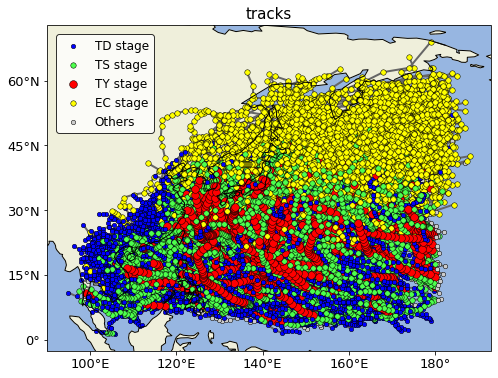

In [5]:
# parse dataset from JMA
TCs_JMA = parse_TCs(fpath, agency='JMA')

# Brief description of dataset
print(TCs_JMA)

# Plotting all TC tracks
TCs_JMA.plot_tracks(add_legend=True)

(<GeoAxesSubplot:title={'center':'Gridding stat.'}>,
 (array([[ 93.        ,  93.        ,  93.        , ...,  93.        ,
           93.        ,  93.        ],
         [ 93.61006289,  93.61006289,  93.61006289, ...,  93.61006289,
           93.61006289,  93.61006289],
         [ 94.22012579,  94.22012579,  94.22012579, ...,  94.22012579,
           94.22012579,  94.22012579],
         ...,
         [188.77987421, 188.77987421, 188.77987421, ..., 188.77987421,
          188.77987421, 188.77987421],
         [189.38993711, 189.38993711, 189.38993711, ..., 189.38993711,
          189.38993711, 189.38993711],
         [190.        , 190.        , 190.        , ..., 190.        ,
          190.        , 190.        ]]),
  array([[-0.60000002, -0.14968556,  0.30062891, ..., 70.09937107,
          70.54968553, 71.        ],
         [-0.60000002, -0.14968556,  0.30062891, ..., 70.09937107,
          70.54968553, 71.        ],
         [-0.60000002, -0.14968556,  0.30062891, ..., 70.099371

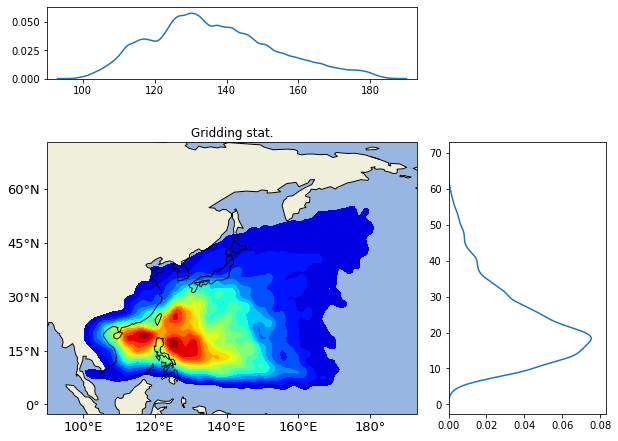

In [6]:
TCs_JMA.binning()

## A single TC manipulation


TC (ID=202111, name=NIDA, year=2021, fcstTime=0, unit=knot)
                  TIME        LAT         LON TYPE     PRS   WND
0  2021-08-03 12:00:00  20.799999  144.399994   TD  1004.0   0.0
1  2021-08-03 18:00:00  22.900000  146.000000   TD  1004.0   0.0
2  2021-08-04 00:00:00  25.100000  146.600006   TS  1002.0  35.0
3  2021-08-04 06:00:00  27.100000  147.199997   TS  1002.0  35.0
4  2021-08-04 12:00:00  28.799999  147.100006   TS  1000.0  40.0
5  2021-08-04 18:00:00  30.299999  147.399994   TS  1000.0  40.0
6  2021-08-05 00:00:00  31.500000  147.600006   TS   998.0  45.0
7  2021-08-05 06:00:00  32.700001  147.699997   TS   998.0  45.0
8  2021-08-05 12:00:00  33.500000  148.000000   TS   998.0  45.0
9  2021-08-05 18:00:00  34.500000  148.600006   TS   998.0  45.0
10 2021-08-06 00:00:00  35.400002  149.800003  STS   996.0  50.0
11 2021-08-06 06:00:00  36.400002  151.399994  STS   996.0  50.0
12 2021-08-06 12:00:00  36.799999  153.199997  STS   996.0  50.0
13 2021-08-06 18:00:00  37.799

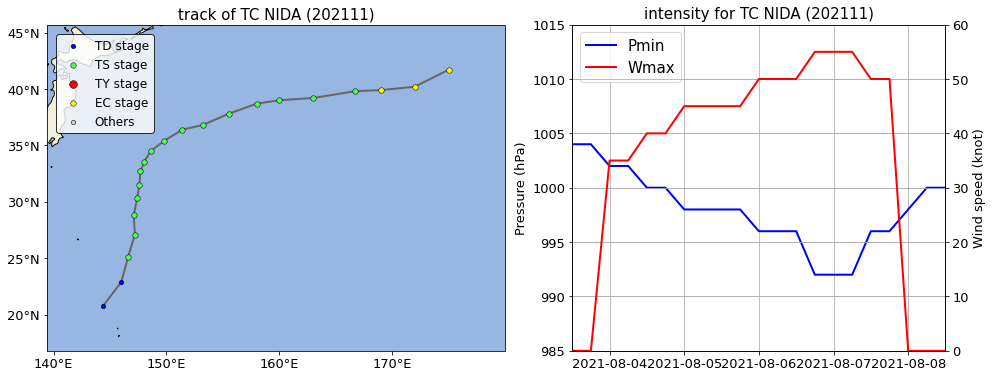

In [7]:
# Selecting single TC
tc = TCs_JMA[-1]
print(tc)
tc.plot()

## Timeseries statistics

<AxesSubplot:title={'center':'ACE and No. of TCs'}, xlabel='Time', ylabel='Number of TCs'>

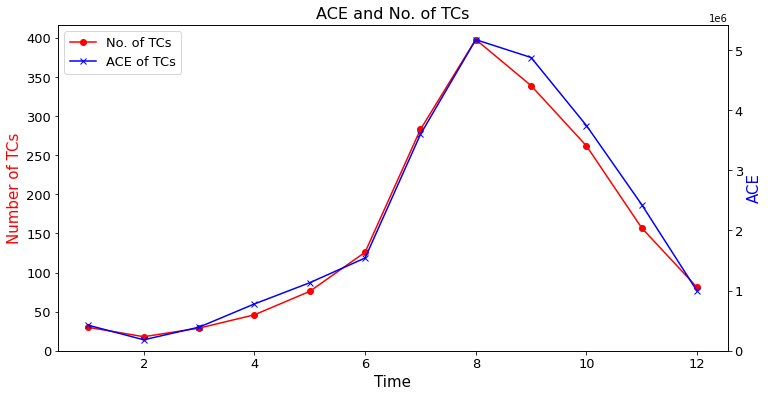

In [8]:
# plot the climatological timeseries of No. and ACE
TCs_JMA.plot_timeseries(freq='annual')